# Chest_xray

## 1. **들어가며**

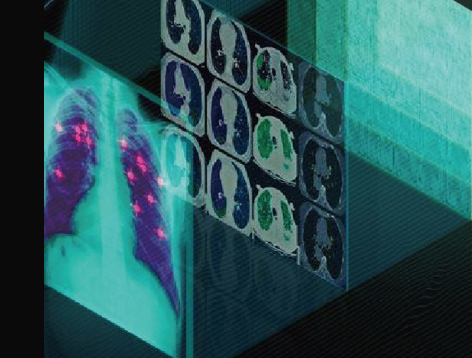

**의료 영상을 분석하는 것은 일반적인 이미지 처리와는 다소 다른 독특한 특징**

- **의료 영상 이미지는 개인 정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않습니다.**
- **라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비쌉니다.**
- **희귀질병을 다루는 경우 데이터를 입수하는 것 자체가 드문 일입니다.**
- **음성/양성 데이터 간 imbalance가 심합니다. 학습에 주의가 필요합니다.**
- **이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있습니다.**

**따라서 의료 영상 처리를 위해서는 딥러닝 영상처리 기술뿐 아니라, 의료 도메인 지식 및 의료 영상에 대한 명확한 이해가 아울러 필요**

**의료 영상의 기초 상식에 대해 간단히 알아보고, 실제로 의료 영상 데이터를 처리하는 실습**

### **사용할 데이터를 미리 준비**

---

**[Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)**

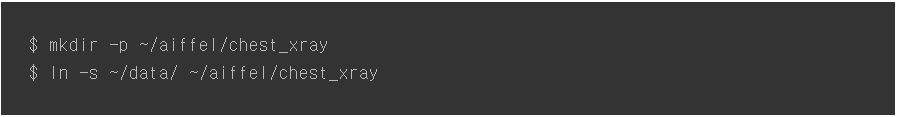

## **2. 의료영상에 대해**

### **1.1 사람 속을 보는 방법**

**여러분들의 폐의 문제를 진단하려면 어떻게 해야 할까요?**

**오늘날이라면 X-RAY(엑스레이) 영상을 찍거나 CT 영상을 찍어서 보면 되겠죠?**

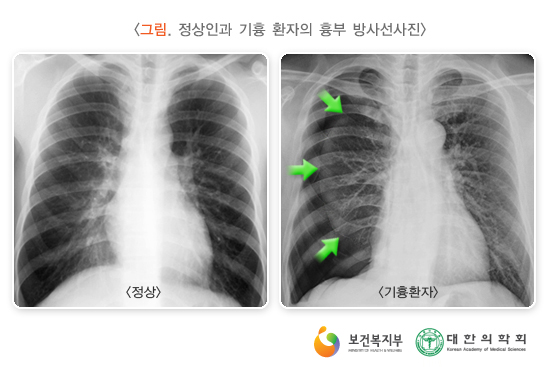
 
**[https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5493](https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=5493)**


**정상 여부 혹은 모양을 보려고 X-RAY, CT를 찍어서 피부에 칼을 대지 않아도 우리의 몸속을 볼 수 있게 되었습니다. 이런 기술은 우리의 평균수명을 향상시키는 데 크게 이바지하고 있습니다.**

### **1.2 의료 영상 종류**

**X-RAY**

- **전자를 물체에 충돌시킬 때 발생하는 투과력이 강한 복사선(전자기파)을 말합니다.**
- **방사선의 일종으로 지방, 근육, 천, 종이같이 밀도가 낮은 것은 수월하게 통과 가능**
- **밀도가 높은 뼈, 금속 같은 물질은 잘 통과 불가능**

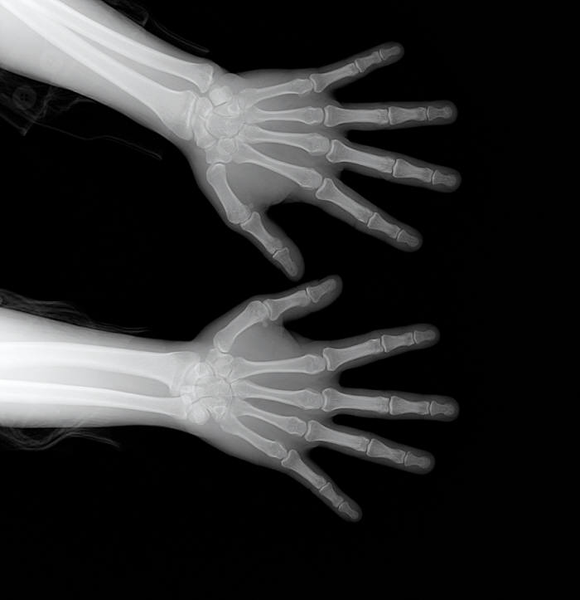

**[http://health.cdc.go.kr/healthinfo/index.jsp](http://health.cdc.go.kr/healthinfo/index.jsp)**

### **CT(Computed Tomography)**

- **환자를 중심으로 X-RAY를 빠르게 회전하여 3D 이미지를 만들어내는 영상**
- **환자의 3 차원 이미지를 형성하여 기본 구조는 물론 가능한 종양 또는 이상을 쉽게 식별하고 위치를 파악 가능**
- **신체의 단면 이미지를 "Slice" 또는 단층 촬영 이미지**
- **기존의 X-RAY보다 더 자세한 정보를 포함**

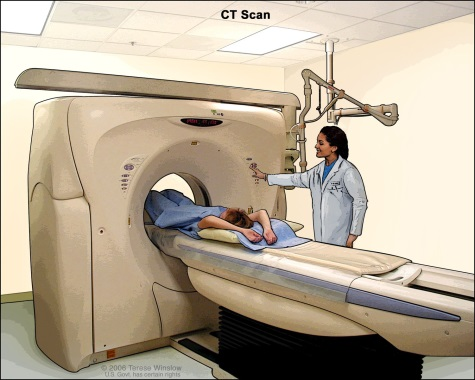

**[http://www.nibib.nih.gov/science-education/science-topics/computed-tomography-ct](http://www.nibib.nih.gov/science-education/science-topics/computed-tomography-ct)**

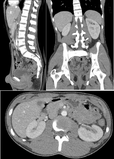

**[http://en.wikipedia.org/wiki/CT_scan](http://en.wikipedia.org/wiki/CT_scan)**

### **MRI(Magnetic Resonance Imaging) - 자기 공명 영상**

- **신체의 해부학적 과정과 생리적 과정을 보기 위해 사용하는 의료 영상 기술**
- **MRI 스캐너는 강한 자기장를 사용하여 신체 기관의 이미지를 생성**
- **CT, X-RAY와 다르게 방사선을 사용하지 않아서 방사선의 위험성에서는 보다 안전**

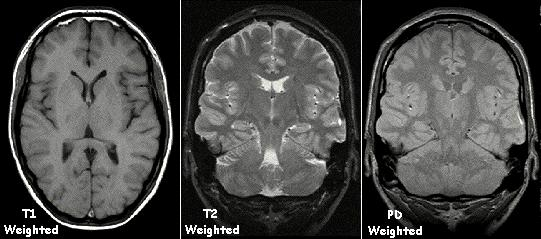

**[http://en.wikipedia.org/wiki/Magnetic_resonance_imaging#:~:text=Magnetic resonance imaging (MRI) is,the organs in the body.](http://en.wikipedia.org/wiki/Magnetic_resonance_imaging#:~:text=Magnetic%20resonance%20imaging%20(MRI)%20is,the%20organs%20in%20the%20body.)**

## **3. X-RAY 이미지**

**X-RAY 이미지를 기반으로 하는 폐렴 진단 딥러닝 모델을 제작**

### **의료영상 자세 분류**

---

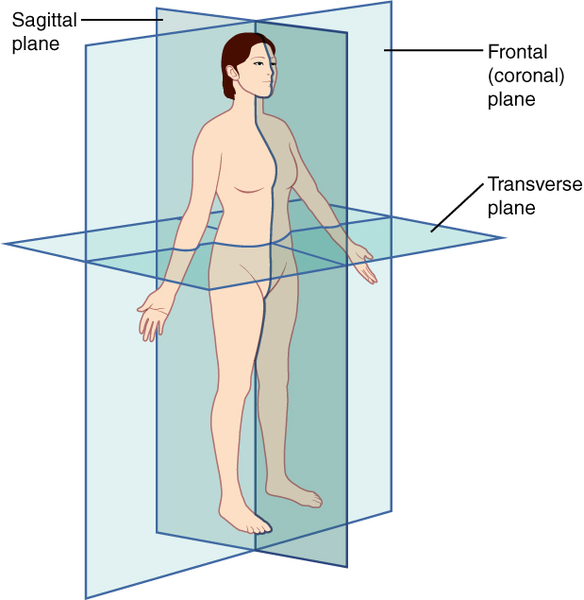

**[https://ko.wikipedia.org/wiki/해부학_용어](https://ko.wikipedia.org/wiki/%ED%95%B4%EB%B6%80%ED%95%99_%EC%9A%A9%EC%96%B4)**

**의료 영상 촬영은 인체를 세 방향의 단면으로 나누어 진행**

- **Sagittal plane : 시상면. 사람을 왼쪽과 오른쪽을 나누는 면**
- **Coronal plane : 관상면. 인체를 앞뒤로 나누는 면**
- **Transverse plane : 횡단면(수평면). 인체를 상하로 나누는 면**

**예시 사진**

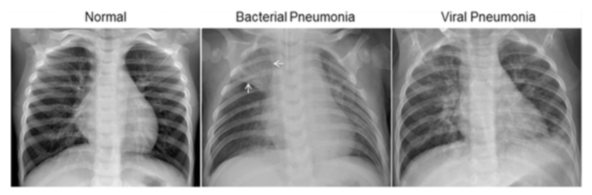

**흉부 부분이며 폐와 갈비뼈가 보이는 것을 육안으로 확인 가능**

**위에서 언급된 3가지 단면 중 어느 방향의 이미지에 해당할까요?**

→ **관상면(Coronal plane)**

**사용할 데이터는 모두 관상면 이미지로 구성**

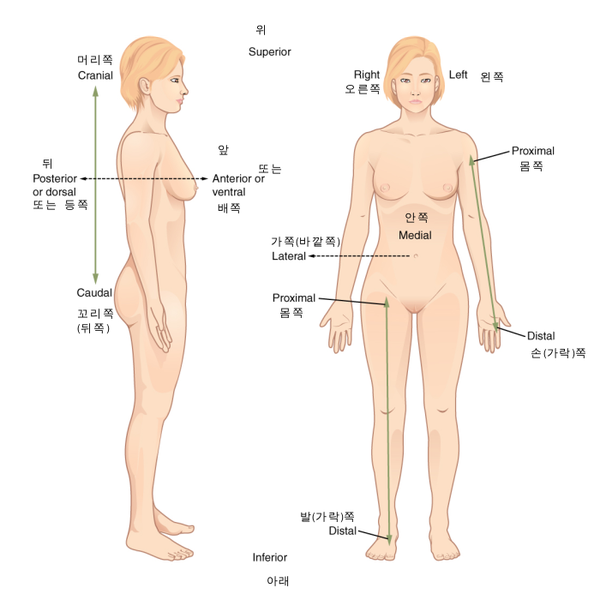

**[https://ko.wikipedia.org/wiki/해부학_용어](https://ko.wikipedia.org/wiki/%ED%95%B4%EB%B6%80%ED%95%99_%EC%9A%A9%EC%96%B4)**

### **영상을 볼 때의 해부학적 위치에 대해서 알아보기**

---

**우리가 영상을 보게 되면 위의 이미지와 같이 보게 됩니다**

**보통 정면을 보고 있는 것으로 가정을 하며 위의 이미지에서 오른쪽에 해당**

**의학 쪽에선 실제 사람의 왼쪽 얼굴을 기준으로 판단**

### **X-RAY 특성**

---

**전자기파가 몸을 통과한 결과를 이미지화 시킨 것**

**통과하고 남은 전자기파의 결과이기 때문에 색상이 아니라 흑백 명암으로 출력**

**부위에 따라서 명암이 다르게 출력**

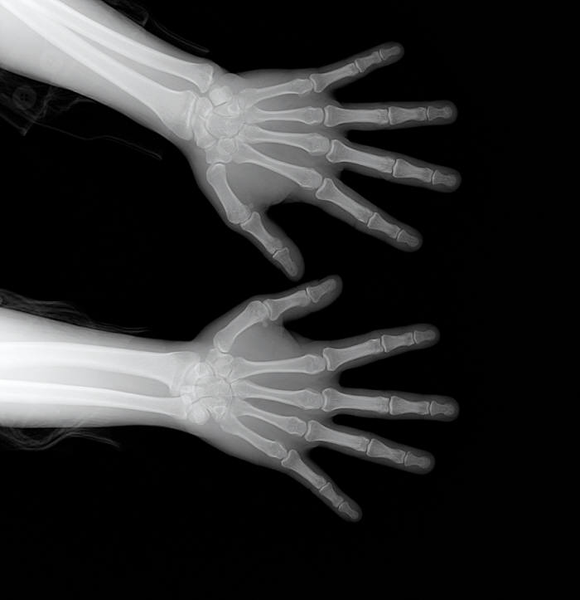

**[뢴트겐과 엑스선](http://m.etnews.com/20181102000172?obj=Tzo4OiJzdGRDbGFzcyI6Mjp7czo3OiJyZWZlcmVyIjtOO3M6NzoiZm9yd2FyZCI7czoxMzoid2ViIHRvIG1vYmlsZSI7fQ%3D%3D)**

**위의 사진은 손을 찍은 사진**

- **뼈 : 하얀색**
- **근육 및 지방 : 연한 회색**
- **공기 : 검은색**

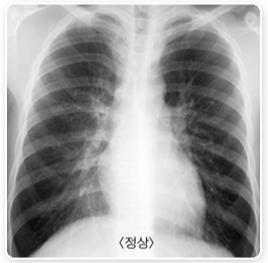

**[http://health.cdc.go.kr/health/Resource/Module/Content/Printok.do?idx=2110&subIdx=4](http://health.cdc.go.kr/health/Resource/Module/Content/Printok.do?idx=2110&subIdx=4)**

**흉부 쪽의 영상을 보겠습니다**

- **갈비뼈 : 하얀색**
- **폐 : 검은색**
- **어깨 쪽의 지방 및 근육 : 연한 회색**

**폐는 공기가 많이 차 있기 때문에 저렇게 검은색으로 출력**

## **4. 폐렴을 진단해보자(1)**

**의료 인공지능은 질병의 정확한 분류 또는 환자의 중증도를 확인하는 등 다양한 용도로 사용**

**현재 가장 핫한 분야는 질병을 탐지해내는 인공지능**

**의사처럼 질병을 찾아내는 딥러닝 모델을 만들기**

**폐렴(Pneumonia)을 찾아내는 딥러닝 모델**

### **데이터셋**

---

**사용할 데이터는 캐글의 Chest X-Ray Images**

- **`~/aiffel/chest_xray/data` 하위에 3개의 폴더 (train, test, val)로 구성**
- **각 이미지 카테고리 (폐렴 / 정상)에 대한 하위 폴더를 포함**
- **5,856 개의 X-Ray 이미지 (JPEG)와 2 개의 범주 (폐렴 / 정상) 존재**
- **전체 데이터의 크기는 총 1.2GB 가량**
- **중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5 세 소아 환자의 흉부 X선 영상**
- **(에디터 주) 캐글에서 다운로드한 데이터는 chest_xray 하위에 chest_xray 폴더가 중복으로 포함되어 있어서 전체 데이터의 크기가 2.5GB인 경우 존재 → 중복 데잍터 불필요**

### **폐렴이란?**

---

> 폐렴(pneumonia 뉴모니아)은 폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다. 세균을 통한 감염이 가장 많으며, 바이러스, 균류, 또는 기타 미생물도 원인이 될 수가 있다. 드물게는 알레르기 반응이나 자극적인 화학 물질을 흡입해 발생하기도 한다. 노인이나 어린아이, 혹은 전체적으로 상태가 안 좋은 환자들이나 기침 반사가 약한 사람들에게는 흡인성 폐렴이 발생한다. 그리고 세균이 원인인 경우는 항생제로 치료를 할 수 있다. 항생제가 생기기 전에는 50~90%가 사망할 정도로 위험한 질환이었으나, 현재는 거의 사망하지 않는다. 1940년대에 항생제가 개발되기 전까지는 폐렴 환자의 1/3 정도가 사망하였다. 오늘날에는 적절한 의학적 치료로 폐렴 환자의 95% 이상이 회복된다. 그러나 일부 저개발국(개발 도상국)에서는 폐렴이 여전히 주요 사망 원인 중 하나이다.

출처 : [https://ko.wikipedia.org/wiki/폐렴](https://ko.wikipedia.org/wiki/%ED%8F%90%EB%A0%B4)
> 

> **염증**은 유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매개체들이 관여하는 보호반응이다. 염증의 목적은 세포의 손상을 초기 단계에서 억제하고, 상처 부분의 파괴된 조직 및 괴사된 세포를 제거하며, 동시에 조직을 재생하는 것이다.

출처 : [https://ko.wikipedia.org/wiki/염증](https://ko.wikipedia.org/wiki/%EC%97%BC%EC%A6%9D)
> 

**염증은 쉽게 말해 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 장소**

**폐렴은 폐에서 바이러스나 세균으로부터 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 상황**

### **폐렴 구별법**

---

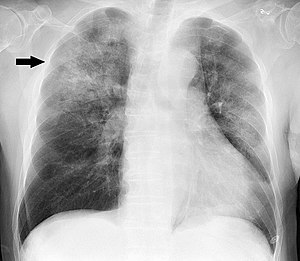

**구별법 : X-RAY 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰**

**실제로 영상을 보면 희미한 경우가 많이 있어 저게 실제로 폐렴으로 인한 것인지 아니면 다른 이유 때문인지 파악하기 난해**

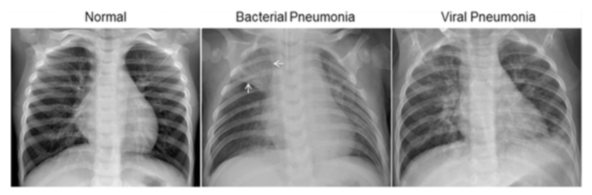

**정상적인 흉부 X-RAY(왼쪽) : 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐를 보여줍니다.**

**세균성 폐렴 (가운데) : 일반적으로 오른쪽 상부 엽 (흰색 화살표)에 있는 표시** 

**바이러스성 폐렴 (오른쪽)은 양쪽 폐에서보다 확산된 "interstitial(조직 사이에 있는)" 패턴으로 표시**

**(참고) 아래 제공되는 실습코드는 이 [캐글 노트북](https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays)을 기반으로 작성된 것임을 밝힙니다.**

## Chest_xray

### **1. Set-up**

---

**프로젝트에서 사용할 패키지 목록 import**

In [1]:
# 프로젝트에서 사용할 패키지 목록 import
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action='ignore')

**필요한 변수들 생성**

- **[tf.data.experimental.AUTOTUNE](https://www.tensorflow.org/guide/data_performance?hl=ko) → ctrl+f → experimental 검색**
   - 성능최적화

In [2]:
# 필요한 변수들 생성
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# 데이터 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray/data/train/*/*' # *은 모든 디렉토리와 파일을 의미합니다.
VAL_PATH = ROOT_PATH + '/chest_xray/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray/data/test/*/*'

# 프로젝트를 진행할 때 아래 두 변수를 변경해보세요
BATCH_SIZE = 16
EPOCHS = 30

print(ROOT_PATH)

/aiffel/aiffel


###  **Step 2. 데이터 가져오기**

---

**이미지 파일들이 있는 디렉토리 구조**

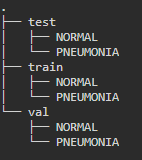

**데이터의 개수 확인**

In [3]:
# 데이터의 개수 확인
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


**train과 val에 있는 데이터를 모은 다음에 train : val를 80:20으로 분할**

In [4]:
# train과 val에 있는 데이터를 모은 다음에 train : val를 80:20으로 분할
# train 데이터와 validation 데이터를 모두 filenames에 담습니다
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# 모아진 filenames를 8:2로 나눕니다
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))

4185
1047


**파일 경로에 힌트로 정상 이미지와 폐렴 이미지를 구분**

In [5]:
# 파일 경로에 힌트로 정상 이미지와 폐렴 이미지를 구분
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')

Normal image path
/aiffel/aiffel/chest_xray/data/train/NORMAL/NORMAL2-IM-1317-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray/data/train/PNEUMONIA/person299_bacteria_1418.jpeg


**NORMAL, PNEUMONIA를 이용해 파일 개수 확인**

In [6]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")


COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")

Normal images count in training set: 1072
Pneumonia images count in training set: 3113


**tf.data 인스턴스를 만들기**

- **tf.data는 tensorflow에서 학습시킬 때, mini-batch로 작업 가능**
- **[mini-batch는 왜 사용하는가?](https://acdongpgm.tistory.com/202)**

In [7]:
# tf.data 인스턴스를 만들기
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

**Train 데이터셋, validation 데이터셋 개수 확인 → val data를 합쳐서 나누는 듯**

- **[tf.data.experimental.cardinality](https://www.tensorflow.org/api_docs/python/tf/data/experimental/cardinality)**

In [8]:
# Train 데이터셋, validation 데이터셋 개수 확인
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")

Training images count: 4185
Validating images count: 1047


**라벨 데이터를 만들어 주는 함수를 만들기**

In [9]:
# 라벨 데이터를 만들어 주는 함수를 만들기
# 파일 경로의 끝에서 두번째 부분을 확인하면 양성과 음성을 구분할 수 있습니다
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)

**이미지 형식 바꾸기, 이미지와 라벨을 읽어오는 함수 만들기**

In [10]:
# 이미지 형식 바꾸기, 이미지와 라벨을 읽어오는 함수 만들기
# 이미지를 알맞은 형식으로 바꿉니다.
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # 이미지를 uint8 tensor로 수정
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 타입으로 수정
    img = tf.image.resize(img, IMAGE_SIZE) # 이미지 사이즈를 IMAGE_SIZE로 수정
    return img

# 이미지 파일의 경로를 입력하면 이미지와 라벨을 읽어옵니다.
def process_path(file_path):
    label = get_label(file_path) # 라벨 검출
    img = tf.io.read_file(file_path) # 이미지 읽기
    img = decode_img(img) # 이미지를 알맞은 형식으로 수정
    return img, label

**train 데이터 셋과 validation 데이터 셋을 만들기**

- **num_parallel_calls 파라미터에 위에서 할당한 AUTOTUNE변수를 이용하면 더욱 빠르게 데이터를 처리**

In [11]:
# train 데이터 셋과 validation 데이터 셋을 만들기
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

**한 개 데이터셋으로 이미지, 라벨링 확인**

In [12]:
# 한 개 데이터셋으로 이미지, 라벨링 확인
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  False


**test 데이터셋 만들기**

In [13]:
# test 데이터셋 만들기
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


### **Tensorflow에서는 tf.data 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 지원**

 **tf.data 파이프라인을 이용**

- **prepare_for_training() 함수를 정의해서 데이터를 변환**
- **shuffle() : 고정 크기 버퍼를 유지**
- **repeat() :**
    - **epoch를 진행하면서 여러 번 데이터셋을 불러올 때 repeat()를 사용한 데이터셋의 경우 여러 번 데이터셋을 사용할 수 있게 지원**
    - **예를 들어, 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요하게 되는 데, repeat()를 사용하면 자동으로 데이터를 맞춰줍니다.**
- **batch() : BATCH_SIZE에서 정한 만큼의 배치로 주어집니다.**
    - **100개의 데이터를 10개의 배치로 나누게 되면 각 배치에는 10개의 데이터로 나뉘게 됩니다.**
- **prefetch() : 학습 데이터를 나눠서 읽어오기 때문에, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄일 수 있습니다.**

In [14]:
#  tf.data 파이프라인을 이용
def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

### **Step 3. 데이터 시각화**

---

- **train에 있는 batch 중 첫 번째 배치를 추출**
- **추출된 배치를 image와 label 데이터 셋으로 나누기**
- **show_batch() 함수를 이용해서 결과 사진을 보기**

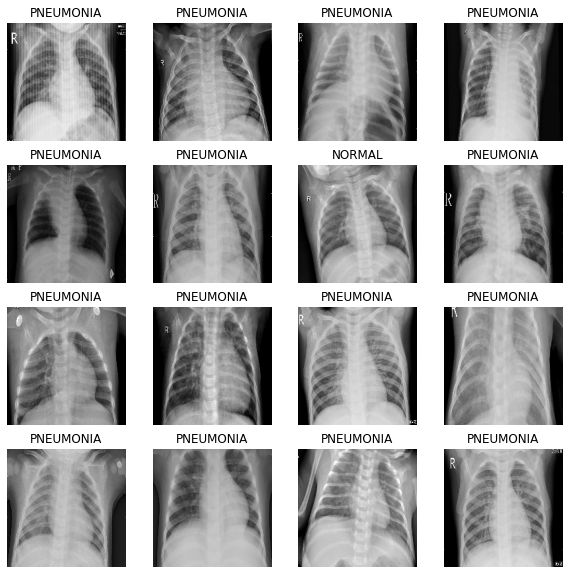

In [15]:
# 이미지 배치를 입력하면 여러장의 이미지를 보여줍니다.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE):
        ax = plt.subplot(4,math.ceil(BATCH_SIZE/4),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

### **Step 4. 데이터 imbalance 처리**

---

**imbalance한 데이터를 해결하는 방법으로 `Weight balancing`이라는 테크닉이 사용**

**Weight balancing**

- **training set의 각 데이터에서 loss를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법**
- **Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight에 클래스별 가중치를 세팅할 수 있도록 지원**
    - **[딥러닝에서 클래스 불균형을 다루는 방법](https://3months.tistory.com/414)**
    

**이미지에 사용할 weight를 세팅**

- **weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정**

In [19]:
# 이미지에 사용할 weight를 세팅
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.95
Weight for PNEUMONIA: 0.67


### **Step 5. CNN 모델링**

- **[CNN, Convolutional Neural Network 요약](http://taewan.kim/post/cnn/)**

**Convolution block을 만들기**

- **conv_block()의 구성**
    - **Convolution을 두 번 진행**
    - **Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결**
    - **Max Pooling**
- **Batch Normalization과 Dropout이라는 두 가지 regularization 기법이 동시에 사용**

In [16]:
# Convolution block을 만들기
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

**Dense Block 만들기**

In [17]:
# Dense Block 만들기
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

📌 **Batch Normalization과 Dropout 두 가지 regularization 기법이 동시에 사용에 대한 의견**

- **반대 → 금기시...**
    - **[Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift](https://openaccess.thecvf.com/content_CVPR_2019/papers/Li_Understanding_the_Disharmony_Between_Dropout_and_Batch_Normalization_by_Variance_CVPR_2019_paper.pdf)**
- **옹호**
    - **[Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Networks](https://arxiv.org/pdf/1905.05928.pdf)**

**모델 완성**

In [18]:
# 모델 완성
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### **Step 6. 모델 훈련**

---

1. **이미지 훈련은 GPU를 사용할 것이기 때문에 먼저 GPU를 선택**
2. **모델은 만들었던 모델 함수인 build_model()을 model에 선언**
3. **loss : "binary_cross entropy" 사용**
4. **optimizer로 'adam'을 사용**
5. **성과를 측정하기 위한 metrics으로 'accuracy', 'precision', 'recall'을 사용**
6. **좋은 평가를 받기 위해 ModelcheckPoint를 이용해서 좋은 모델 저장**
7. **저장된 모델로 평가**

**모델 compile**

In [20]:
# 모델 compile
with tf.device('/GPU:0'):  # 1
    model = build_model()  # 2

    METRICS = [   # 5
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',  # 4
        loss='binary_crossentropy',  # 3
        metrics=METRICS  # 5
    )

**모델 학습**
-  keras.callbacks cb, es 추가

In [21]:
# 모델 학습
from tensorflow import keras
with tf.device('/GPU:0'):
    
    cb = keras.callbacks.ModelCheckpoint('best-model.h5')
    es = keras.callbacks.EarlyStopping(
        patience=3,
        restore_best_weights=True)
  
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
        callbacks = [cb, es]
    )

Epoch 1/30
261/261 [==============================] - 63s 189ms/step - loss: 0.4128 - accuracy: 0.7811 - precision: 0.9532 - recall: 0.7420 - val_loss: 0.6824 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 2/30
261/261 [==============================] - 49s 189ms/step - loss: 0.2305 - accuracy: 0.9083 - precision: 0.9756 - recall: 0.8993 - val_loss: 1.4252 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 3/30
261/261 [==============================] - 49s 189ms/step - loss: 0.1955 - accuracy: 0.9215 - precision: 0.9796 - recall: 0.9134 - val_loss: 0.1338 - val_accuracy: 0.9462 - val_precision: 0.9381 - val_recall: 0.9921
Epoch 4/30
261/261 [==============================] - 50s 192ms/step - loss: 0.1657 - accuracy: 0.9368 - precision: 0.9827 - recall: 0.9314 - val_loss: 0.1602 - val_accuracy: 0.9337 - val_precision: 0.9223 - val_recall: 0.9935
Epoch 5/30
261/261 [==============================] - 51s 197ms/step - loss: 0.1790 - accura

### ****7. 결과 확인****

---

**Epochs 마다 모델의 precision, recall, accuracy, loss 변화 그래프**

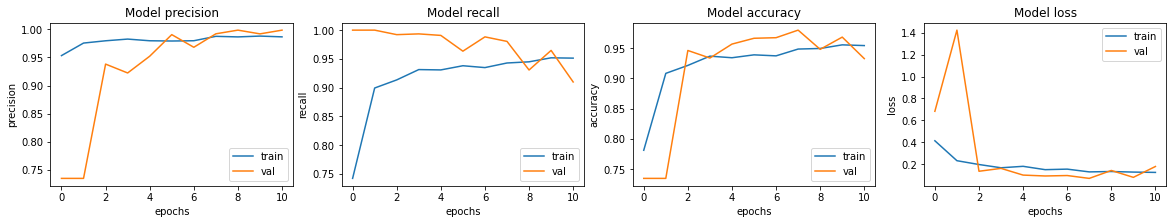

In [22]:
# Epochs 마다 모델의 precision, recall, accuracy, loss 변화 그래프
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

**keras.callbacks.ModelCheckpoint를 이용해 저장된 best 모델 불러오기**

In [23]:
best_model = keras.models.load_model('best-model.h5')

**best모델로 평가 후 loss, accuracy, precision, recall 값을 출력**

In [24]:
# loss, accuracy, precision, recall 값을 출력
loss, accuracy, precision, recall = best_model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 5s 106ms/step - loss: 0.3311 - accuracy: 0.8814 - precision: 0.8641 - recall: 0.9615
Loss: 0.3311392366886139,
Accuracy: 0.8814102411270142,
Precision: 0.8640552759170532,
Recall: 0.9615384340286255


**의료 데이터의 경우 구하기도 어렵고 구하더라도 데이터가 작은 경우가 많아서 이를 해결하기 위해 Data augmentation 방법을 많이 시도**

**의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용**

- **이미지 회전, 가우시안 노이즈 추가 방법 등을 많이 사용**
- **노이즈 추가 방법 :장기의 크기는 사람마다 거의 바뀌지 않는 특성을 이용한 방법**

**GAN을 이용해서 Data augmentation을 시도**

## 회고

### 이번 프로젝트에서 어려웠던 점
- 기본적으로 제공하는 코드가 좋아서 어려웠던 점은 없었다....

### 프로젝트를 진행하면서 알아낸 점
- x_ray, CT, MRI에 대해 조금 알게됨..
- GPU를 사용하면서 모델 훈련을 하는 것
- imbalance한 데이터를 해결하는 방법으로 Weight balancing이라는 테크닉이 사용
- Convolution block, Dense Block을 만들어 다양한 방법으로 모델링 가능

### 아직 모호한 점
-  Batch Normalization, tf.data.experimental.cardinality를 tensorflow 문서를 읽어도 잘 이해가 안됨.

### 루브릭 평가 지표를 맞추기 위해 **시도한 것들**
**먼저 하신 분들의 이야기를 들어보니 원래 모델이 좋았다고 이야기하시길래..   
데이터를 훈련했더니 70% 후반의 정확도가 나와서  
callbacks에서 제일 좋은 모델을 저장하고 earlystopping를 주어서 재훈련실행  
저장한 모델로 테스트 세트 검증하니 88%가 나와서.. 정지**

- 데이터 증강은 아직 잘 못해서 시도하지 않음..

### **자기 다짐**
- python공부를 하자!!
